In [65]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def calculateVanishingPt(l1, l2):
  cross1 = np.cross(a = np.array([l1[0], l1[1], 1]), b = np.array([l1[2], l1[3], 1]))
  cross2 = np.cross(a = np.array([l2[0], l2[1], 1]), b = np.array([l2[2], l2[3], 1]))
  cross3 = np.cross(a = cross1, b = cross2)
  cross3 = cross3 / cross3[2]
  return cross3[:2]
    
# Loads an image
src = cv.imread("./data/table_bottle_01.jpg", cv.IMREAD_GRAYSCALE)
# Check if image is loaded fine
if src is None:
    print ("Error opening image!")
    exit()
    
# Edge detection   
dst = cv.Canny(src, 100, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
lines = cv.HoughLinesP(dst, 1, np.pi / 720, 50, None, 150, 10)
vanishingPts = []
linePairs = []
vanishingPtSelection = []

if lines is None:
    print ("Error could not find lines!")
    exit()

for i in range(0, len(lines)):
    l1 = lines[i][0]
    
    for j in range(i + 1, len(lines)):
        l2 = lines[j][0]
        lvec1 = np.array([l1[0], l1[1]]) - np.array([l1[2], l1[3]])
        lvec1 = lvec1 / np.linalg.norm(lvec1)
        lvec2 = np.array([l2[0], l2[1]]) - np.array([l2[2], l2[3]])
        lvec2 = lvec2 / np.linalg.norm(lvec2)
        # compare angle
        if np.arccos(abs(np.dot(lvec1, lvec2))) < np.deg2rad(20):
            lvec1ort = np.array([lvec1[0], -lvec2[1]])
            ldist = np.dot(lvec1ort, np.array([l1[2], l1[3]]) - np.array([l2[2], l2[3]]))
            if ldist > 500:
                vanishingPts.append(calculateVanishingPt(l1, l2))
                linePairs.append((l1, l2))

for i in range(0, len(vanishingPts)):
    closePtsCount = 0
    for j in range(i + 1, len(vanishingPts)):
        if abs(vanishingPts[i][0] - vanishingPts[j][0]) > 10 and abs(vanishingPts[i][1] - vanishingPts[j][1]) < 1000:
            closePtsCount += 1
    if closePtsCount > 0:
        vanishingPtSelection.append(i)

for i in vanishingPtSelection:
    cv.line(cdst, (linePairs[i][0][0], linePairs[i][0][1]), vanishingPts[i].astype(np.int32), (0,0,255), 3, cv.LINE_AA)

cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cv.resize(cdst, (0,0), fx = 0.5, fy = 0.5))
cv.waitKey()

-1

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

l1 = np.array([[0, 0], [1, 10]])
l2 = np.array([[0, 0], [2, 10]])
lines = np.array([l1, l2])
plt.plot(x[:,0], x[:,1], '-')

5
27


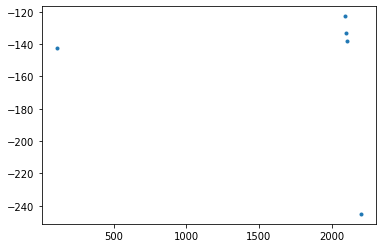

In [50]:
x = np.array(vanishingPts)
x = x[vanishingPtSelection]
plt.plot(x[:,0], x[:,1], '.')
print(len(vanishingPtSelection))
print(len(lines))